In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#############Prepare Data

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


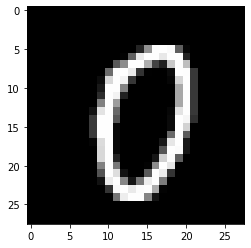

In [ ]:
test = x_train[1000]
plt.imshow(test, cmap = 'gray')
plt.show()

In [ ]:
#Pre-process
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
#Make sure input shape = 28*28*1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], " - Train samples")
print(x_test.shape[0], " - Test samples")

x_train shape:  (60000, 28, 28, 1)
60000  - Train samples
10000  - Test samples


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
####Build model

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
###Train Model

In [ ]:
batch_size = 128
epochs = 15

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 45s 104ms/step - loss: 0.3630 - accuracy: 0.8894 - val_loss: 0.0813 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 57s 135ms/step - loss: 0.1150 - accuracy: 0.9645 - val_loss: 0.0572 - val_accuracy: 0.9833
Epoch 3/15
422/422 [==============================] - 48s 114ms/step - loss: 0.0858 - accuracy: 0.9731 - val_loss: 0.0473 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 43s 102ms/step - loss: 0.0739 - accuracy: 0.9775 - val_loss: 0.0467 - val_accuracy: 0.9873
Epoch 5/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.0363 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0394 - val_ac

In [ ]:
######Evaluluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.0254663098603487
Test accuracy:  0.9914000034332275
